In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train.max()

255

In [5]:
x_train.min()

0

In [6]:
x_train = x_train/255.0

In [7]:
x_test = x_test/255.0

In [8]:
import matplotlib.pyplot as plt

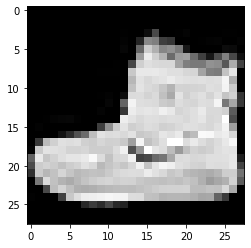

In [9]:
plt.imshow(x_train[0],cmap='gray')

In [10]:
y_train[0]

9

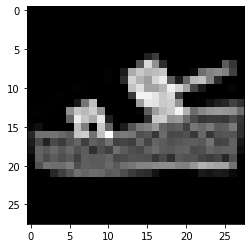

In [11]:
plt.imshow(x_train[12],cmap='gray')

In [12]:
y_train[12]

5

In [13]:
import numpy as np

In [14]:
x_train = np.stack((x_train,)*3, axis=-1)

In [15]:
x_train.shape

(60000, 28, 28, 3)

In [16]:
x_test = np.stack((x_test,)*3, axis=-1)

In [17]:
x_test.shape

(10000, 28, 28, 3)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train,10)

In [20]:
y_test = to_categorical(y_test,10)

In [21]:
y_train[12]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [23]:
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(filters=128,kernel_size=(4,4),input_shape=(28,28,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,3),activation='relu')) 
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 25, 25, 128)       6272      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 64)          131136    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [32]:
model.fit(x_train,y_train,verbose=1,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 198s 105ms/step - loss: 0.4407 - accuracy: 0.8384
Epoch 2/10
1875/1875 [==============================] - 202s 108ms/step - loss: 0.3003 - accuracy: 0.8888
Epoch 3/10
1875/1875 [==============================] - 200s 107ms/step - loss: 0.2563 - accuracy: 0.9049
Epoch 4/10
1875/1875 [==============================] - 204s 109ms/step - loss: 0.2246 - accuracy: 0.9151
Epoch 5/10
1875/1875 [==============================] - 212s 113ms/step - loss: 0.1992 - accuracy: 0.9243
Epoch 6/10
1875/1875 [==============================] - 203s 108ms/step - loss: 0.1735 - accuracy: 0.9340
Epoch 7/10
1875/1875 [==============================] - 202s 108ms/step - loss: 0.1549 - accuracy: 0.9417
Epoch 8/10
1875/1875 [==============================] - 201s 107ms/step - loss: 0.1379 - accuracy: 0.9470
Epoch 9/10
1875/1875 [==============================] - 203s 108ms/step - loss: 0.1238 - accuracy: 0.9530
Epoch 10/10
1875/1875 [=======================

In [33]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.3319 - accuracy: 0.9036


[0.33191725611686707, 0.9035999774932861]

In [34]:
from sklearn.metrics import classification_report

In [35]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


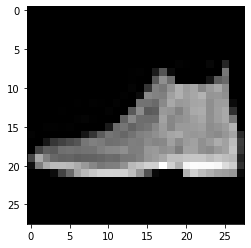

In [36]:
plt.imshow(x_test[0])

In [37]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [38]:
predictions[0]

9

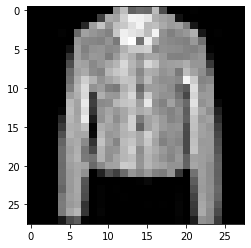

In [39]:
plt.imshow(x_test[10])

In [40]:
y_test[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [41]:
predictions[10]

4

In [42]:
y_test = np.argmax(y_test,axis=1)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.87      0.85      1000
           3       0.92      0.92      0.92      1000
           4       0.90      0.77      0.83      1000
           5       0.97      0.99      0.98      1000
           6       0.73      0.69      0.71      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000

